In [12]:
import pandas as pd

df = pd.read_csv('../data/renewable_power_plants_FR.csv')
df.head()


/tmp/ipykernel_15371/1453920945.py:3: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/renewable_power_plants_FR.csv')


,electrical_capacity,energy_source_level_1,energy_source_level_2,energy_source_level_3,technology,data_source,nuts_1_region,nuts_2_region,nuts_3_region,lon,...,departement,departement_code,commissioning_date,connection_date,disconnection_date,number_of_installations,site_name,IRIS_code,EIC_code,as_of_year
0,0.400,Renewable energy,Hydro,NaN,Other or unspecified technology,Open Data Réseaux Énergies,FRC,FRC2,FRC22,5.773316,...,Jura,39.0,1900-01-01,1900-01-01,NaN,1,NaN,390130000.0,17W000000401567C,2018
1,2.800,Renewable energy,Hydro,NaN,Other or unspecified technology,Open Data Réseaux Énergies,FRI,FRI2,FRI21,2.491747,...,Corrèze,19.0,1900-01-01,1900-01-01,NaN,1,EDF DPIH BORT,190280000.0,17W000000405645Z,2018
2,6.281,Renewable energy,Hydro,NaN,Other or unspecified technology,Open Data Réseaux Énergies,FRI,FRI2,FRI22,1.889109,...,Creuse,23.0,1900-01-01,1900-01-01,NaN,1,EDF DPIH CHAMPSANGLARD,230490000.0,17W000000154954I,2018
3,1.200,Renewable energy,Hydro,NaN,Other or unspecified technology,Open Data Réseaux Énergies,FRG,FRG0,FRG03,-0.624538,...,Mayenne,53.0,1900-01-01,1900-01-01,NaN,1,NaN,530030000.0,17W000000060974X,2018
4,21.000,Renewable energy,Hydro,NaN,Other or unspecified technology,Open Data Réseaux Énergies,FRK,FRK2,FRK26,4.889226,...,Rhône,69.0,1900-01-01,1900-01-01,NaN,1,CUSSET RIVE DROITE,692661602.0,17W0000004129049,2018


In [13]:
df.describe()

,electrical_capacity,lon,lat,municipality_code,region_code,municipality_group_code,departement_code,IRIS_code,as_of_year
count,56097.000000,55856.000000,55856.000000,55692.000000,40787.000000,4.056100e+04,40701.000000,2.979700e+04,56097.000000
mean,0.465744,2.502818,46.390964,46112.238221,63.024616,2.151305e+08,45.537849,4.364409e+08,2017.727080
std,1.957015,2.699479,2.197709,25773.241448,22.363030,2.113737e+07,25.965298,2.524681e+08,0.445464
min,0.001000,-5.085638,41.435524,1001.000000,11.000000,2.000002e+08,1.000000,1.001000e+07,2017.000000
25%,0.026260,0.385604,44.400070,24447.250000,44.000000,2.000600e+08,23.000000,2.224300e+08,2017.000000
50%,0.078240,2.493446,46.412190,45120.000000,75.000000,2.000699e+08,44.000000,4.028401e+08,2018.000000
75%,0.115700,4.715823,48.293826,67273.000000,76.000000,2.430006e+08,67.000000,6.513800e+08,2018.000000
max,80.000000,9.529433,51.072948,95680.000000,93.000000,2.495005e+08,95.000000,9.563701e+08,2018.000000


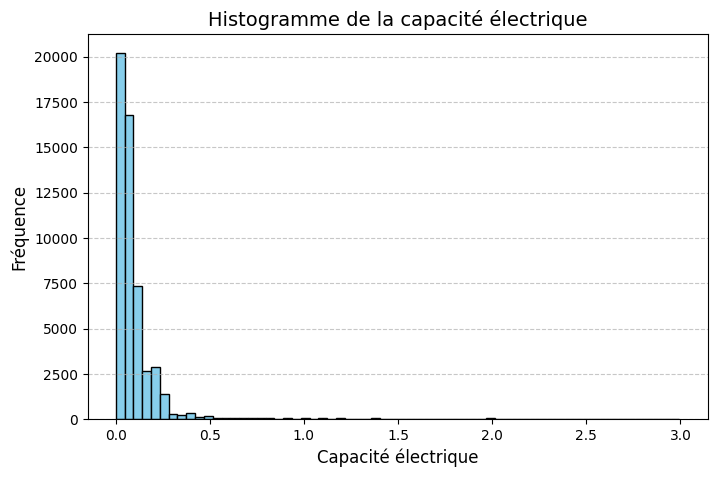

In [19]:
import matplotlib.pyplot as plt


filtered_df = df[df["electrical_capacity"]<3]


# Dessiner l'histogramme
plt.figure(figsize=(8, 5))
plt.hist(filtered_df["electrical_capacity"], bins=64, color="skyblue", edgecolor="black")
plt.title("Histogramme de la capacité électrique", fontsize=14)
plt.xlabel("Capacité électrique", fontsize=12)
plt.ylabel("Fréquence", fontsize=12)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

In [5]:
df.to_json("../data/reneweable_power_plants_FR.json", orient="records", lines=True)

In [6]:
import numpy as np
# Haversine distance
def haversine(lat1, lon1, lat2, lon2):
    # Earth radius
    R = 6371.0
    
    # to radians
    lat1, lon1, lat2, lon2 = map(np.radians, [lat1, lon1, lat2, lon2])
    
   
    dlat = lat2 - lat1
    dlon = lon2 - lon1
    
    # Haversine
    # https://fr.wikipedia.org/wiki/Formule_de_haversine
    a = np.sin(dlat / 2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon / 2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    return R * c

def distance_between(idx1, idx2):
    distance = haversine(df["lat"][idx1], df["lon"][idx1], df["lat"][idx2], df["lon"][idx2])
    print(f"distance between  {df['municipality'][idx1]} and {df['municipality'][idx2]} : {distance}")


distance_between(0, 1)

distance between  Arbois and Bort-les-Orgues : 302.91591753887565


In [7]:
# Trouver l'installation la plus proche
def find_closest_installation(idx1):
    lat1, lon1 = df["lat"][idx1], df["lon"][idx1]
    print(f"on recherche autour de {df['municipality'][idx1]}")

    closest = []
    min_distance = float("inf")
    closest_installation = None
       
    for i in range(len(df)):

        if i == idx1:
            continue
    
        lat2, lon2 = df["lat"][i], df["lon"][i]
        distance = haversine(lat1, lon1, lat2, lon2)
        
        if distance < min_distance:
            min_distance = distance
            closest_installation = df["municipality"][i]
            print(i, closest_installation)
        
    print(f"l'installation la plus proche de {df['municipality'][idx1]} est {closest_installation}")
       


find_closest_installation(10)



on recherche autour de Saint-Flour
0 Arbois
1 Bort-les-Orgues
12 Lavoûte-sur-Loire
16 Chambles
19 Châtel-Montagne
21 Saint-Nectaire
23 Saint-Gervais-sous-Meymont
328 Sauviat
5918 Domaize
51716 Trézioux
l'installation la plus proche de Saint-Flour est Trézioux


In [13]:
import json

def row_to_json(idx):
    row = df.iloc[idx].dropna()
    row_json = row.to_dict()
    formatted_json = json.dumps(row_json, indent=4)

    with open(f"../data/power_plant_{idx}.json", "w") as file:
        file.write(formatted_json)

row_to_json(0)
